In [1]:
import torch
import numpy as np
from torch import tensor
from numpy import array
from numpy import transpose

In [2]:
# input is scalar, output is scalar
x = tensor(1.0, requires_grad=True)
print('x:', x)
y = x**2
print('y:', y)
y.backward() # this is the same as y.backward(tensor(1.0))
print('x.grad:', x.grad)

# want: dy/dx
# dy/dx = d(x^2)/dx = 2x where x is 1, so
# gradient is 2

x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
x.grad: tensor(2.)


In [3]:
x = x.detach().numpy()
J = array([[2*x]])
print('J:', J)

J: [[2.]]


In [4]:
v = array([[1,]])
print('v:', v)
print('v*J:', v@J)

v: [[1]]
v*J: [[2.]]


In [5]:
# input is scalar, output is scalar, non-default gradient
x = torch.tensor(1.0, requires_grad=True)
print('x:', x)
y = x**2
print('y:', y)
gradient_value=100.0
print(y.backward(torch.tensor(gradient_value)))
print('x.grad:', x.grad)

x: tensor(1., requires_grad=True)
y: tensor(1., grad_fn=<PowBackward0>)
None
x.grad: tensor(200.)


In [6]:
x = x.detach().numpy()
J = array([[2*x]])
print('J:', J)

v = array([[gradient_value,]])
print('v:', v)
print('v*J:', v@J)

J: [[2.]]
v: [[100.]]
v*J: [[200.]]


In [7]:
# input is vector, output is scalar
x = tensor([1.,2.], requires_grad=True)
print('x:', x)
y = sum(x)
print('y:', y)
y.backward()
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor(3., grad_fn=<AddBackward0>)
x.grad: tensor([1., 1.])


In [8]:
J = array([[1,1]])
print('J:\n', J)

J:
 [[1 1]]


In [9]:
v = array([[1]])
print('v:', v)
print('v*J:', v@J)

v: [[1]]
v*J: [[1 1]]


In [10]:
# input is vector, output is vector
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 1.]
y.backward(tensor(gradient_value))
print('x.grad', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad tensor([ 6., 12.])


In [11]:
x = x.detach().numpy()
J = array([[6*x[0], 0],
           [0,6*x[1]]])
print('J:\n', J)

J:
 [[ 6.  0.]
 [ 0. 12.]]


In [12]:
v = array([gradient_value])
# v = 1 10 100

# J = 6 0
#      0 12
print('v trans:', transpose(v)) 
print('J trans:', transpose(J))

print('v:', v)
print('v*J:', v@J)

v trans: [[1.]
 [1.]]
J trans: [[ 6.  0.]
 [ 0. 12.]]
v: [[1. 1.]]
v*J: [[ 6. 12.]]


In [13]:
# input is vector, output is vector, non-one gradient
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = 3*x**2
print('y:', y)
gradient_value = [1., 10.]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 12.], grad_fn=<MulBackward0>)
x.grad: tensor([  6., 120.])


In [14]:
x = x.detach().numpy()
J = array([[6*x[0], 0], [0, 6*x[1]]])
print('J:\n', J)

v = array([gradient_value])
print('v:', v)
print('v*J:', v@J)

J:
 [[ 6.  0.]
 [ 0. 12.]]
v: [[ 1. 10.]]
v*J: [[  6. 120.]]


In [15]:
# input is vector, output is vector - another example
x = tensor([1., 2.], requires_grad=True)
print('x:', x)
y = torch.empty(3)
y[0]=3*x[0]**2
y[1]=x[0]**2 + 2*x[1]**3
y[2]=10*x[1]
print('y:', y)
gradient_value = [1., 10., 100.,]
y.backward(tensor(gradient_value))
print('x.grad:', x.grad)

x: tensor([1., 2.], requires_grad=True)
y: tensor([ 3., 17., 20.], grad_fn=<CopySlices>)
x.grad: tensor([  26., 1240.])


In [16]:
x = x.detach().numpy()
J = array([[6*x[0], 0],
          [2*x[0], 6*x[1]**2],
          [0, 10]])
print('J:\n', J)

# the jacobian matrix
# 6 0         
# 2 24    
# 0 10         

v = array([1., 1., 1.])
# vector
# 1
# 10
# 100

print('v:', v)
print('v*J:', v@J)
# output ??
# 8
# 34

J:
 [[ 6.  0.]
 [ 2. 24.]
 [ 0. 10.]]
v: [1. 1. 1.]
v*J: [ 8. 34.]


In [17]:
#########
a = tensor([2., 3.], requires_grad=True)
b = tensor([6., 4.], requires_grad=True)
print('a:', a)
print('b:', b)

Q = 3*a**3 - b**2
# Jacobian matrix
#
#
#


print('Q:', Q)
gradient = tensor([1., 1.])
Q.backward(gradient=gradient)
print('a.grad:', a.grad)
print('b.grad:', b.grad)


a: tensor([2., 3.], requires_grad=True)
b: tensor([6., 4.], requires_grad=True)
Q: tensor([-12.,  65.], grad_fn=<SubBackward0>)
a.grad: tensor([36., 81.])
b.grad: tensor([-12.,  -8.])


In [18]:
from torch.autograd import Variable
import torch

In [19]:
x = Variable(torch.FloatTensor([[1, 2, 3, 4]]), requires_grad=True)
z = 2*x
loss = z.sum(dim=1)
print('x:', x)
print('z:', z)
print('loss:', loss)

# do backward for first element of z
z.backward(torch.FloatTensor([[1,0,0,0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_() #remove gradient in x.grad, or it will accumulate

# do backward for second element of z
z.backward(torch.FloatTensor([[0,1,0,0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# do backward for all elements of z, with weight equal to the derivitive of
# loss with respect to z_1, z_2, z_3, and z_4
z.backward(torch.FloatTensor([[1,1,1,1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# or we can directly backprop using loss
loss.backward()
print(x.grad.data)

x: tensor([[1., 2., 3., 4.]], requires_grad=True)
z: tensor([[2., 4., 6., 8.]], grad_fn=<MulBackward0>)
loss: tensor([20.], grad_fn=<SumBackward1>)
tensor([[2., 0., 0., 0.]])
tensor([[0., 2., 0., 0.]])
tensor([[2., 2., 2., 2.]])
tensor([[2., 2., 2., 2.]])


In [20]:
x = torch.ones(3, requires_grad=True)
print(x)
# 1 1 1
y = 2*x**2 # y = 2x^2
print(y)
# 2 2 2
z = 5*y # z = 5y
print(z)
# 10 10 10
 # L = z + z + z
# 30
print(z)
# z.backward(tensor([1,1,1]))
loss = z.sum()
print(loss)
loss.backward()
print(x.grad)

# want dz/dx
# dz/dy = d(5y)/dy = 5
# dy/dx = d(2x^2)/dx = 4x
# dz/dx = dz/dy * dy/dx = 5 * 4x
# where x is = 1 so we have
# 5 * 4(1) = 20
# thus the grad is 20


tensor([1., 1., 1.], requires_grad=True)
tensor([2., 2., 2.], grad_fn=<MulBackward0>)
tensor([10., 10., 10.], grad_fn=<MulBackward0>)
tensor([10., 10., 10.], grad_fn=<MulBackward0>)
tensor(30., grad_fn=<SumBackward0>)
tensor([20., 20., 20.])


Implementing basic NN 

We are essentially trying to calculate the correct weights so our output is essentially, λx.2x



In [21]:
import numpy as np
from numpy import array

In [22]:
# f = w * x
# f = 2 * x

X = array([1,2,3,4], dtype=np.float32)
Y = array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w*x
# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()
    
# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)
def gradient(x,y,y_predicted):
    return ((2*x)@(y_predicted-y)).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')


print(f'prediction after taining f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
prediction after taining f(5) = 9.999


That stuff put with pytorch

1. Design our model (input size, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass: compute prediction
    - backward pass: gradients
    - update our weights


In [23]:
import torch
from torch import tensor
import torch.nn as nn

In [24]:
X = tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = tensor([[2],[4],[6],[8]], dtype=torch.float32)

# forward

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features
# model = nn.Linear(input_size, output_size,)

class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)
    
model = LinearRegression(input_size, output_size)

# model prediction
X_test = tensor([5.])
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# SGD = Stochastic Gradient Descent 

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass
    l.backward() #dL/dw
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch + 1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')


print(f'prediction after taining f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = -4.832
epoch 1: w = -0.369, loss = 70.25897217
epoch 11: w = 1.553, loss = 1.82658696
epoch 21: w = 1.864, loss = 0.05556539
epoch 31: w = 1.916, loss = 0.00926132
epoch 41: w = 1.926, loss = 0.00760795
epoch 51: w = 1.930, loss = 0.00713630
epoch 61: w = 1.932, loss = 0.00672018
epoch 71: w = 1.934, loss = 0.00632901
epoch 81: w = 1.936, loss = 0.00596063
epoch 91: w = 1.938, loss = 0.00561370
prediction after taining f(5) = 9.875


Implementing linear regression

In [25]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
#0) prepare data
#1) model
#2) loss and optimizer
#3) training loop

epoch: 10, loss: 4431.1890
epoch: 20, loss: 3303.3381
epoch: 30, loss: 2487.8652
epoch: 40, loss: 1897.5914
epoch: 50, loss: 1469.8834
epoch: 60, loss: 1159.6711
epoch: 70, loss: 934.4776
epoch: 80, loss: 770.8683
epoch: 90, loss: 651.9117
epoch: 100, loss: 565.3616


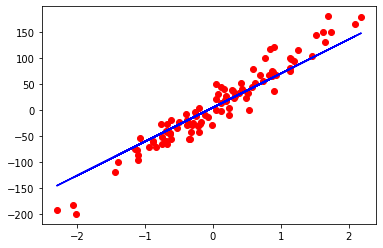

In [26]:
# preparing data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)   

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = .01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
# training loops
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    yp = model(X)
    loss = criterion(yp, Y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')
    
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()    

Logistic Regression
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. training loop
    - forward pass: prediction and loss
    - backward pass: gradients
    - update weights 

In [27]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
# prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterian = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# training
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


569 30
epoch: 10, loss = 0.1784
epoch: 20, loss = 0.1586
epoch: 30, loss = 0.1434
epoch: 40, loss = 0.1315
epoch: 50, loss = 0.1219
epoch: 60, loss = 0.1140
epoch: 70, loss = 0.1075
epoch: 80, loss = 0.1020
epoch: 90, loss = 0.0972
epoch: 100, loss = 0.0931
accuracy = 0.8684


The breast cancer data is stored in a sklearn 'bunch'
This is essentially a python dictionary

In [29]:
bc = datasets.load_breast_cancer()
print('type: ', type(bc))

type:  <class 'sklearn.utils._bunch.Bunch'>


We then get the following keys

In [30]:
print('keys: ', bc.keys())

keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


*data* is all the feature data (the attributes of the scan that help us identify if the tumor is malignant or benign, such as radius, area, etc.) in a NumPy array

*target* is the target data (the variable you want to predict, in this case whether the tumor is malignant or benign) in a NumPy array

data in this case, represent the features of our NN, that is, the variables of our model that we use to predict the target

In our case, the target data is one column that classifies the tumor as either 0 indicating malignant, or 1 for benign

feature_names are the names of the features variables, in other words, names of the columns in data

target_names is the names of the target variables, in other words names of the target columns

DESCR, is a description of the dataset

filename is the path to the actual file of the data in CSV format

In [31]:
print('feature names: ', bc.feature_names)
print('target names: ', bc.target_names)
print('DESCR: ', bc.DESCR)
print('filename: ', bc.filename)

feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target names:  ['malignant' 'benign']
DESCR:  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (sta

now as a pandas dataframe

In [32]:
# import pandas
import pandas as pd

# read the df, first using the feature data
df = pd.DataFrame(bc.data, columns=bc.feature_names)

# add a target column, and fill it with the target data
df['target'] = bc.target

# show the first five rows
df.head(15)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

lets do some ML

In [34]:
# store the feature data
X = bc.data

# store the target data
y = bc.target

# split the data using sklearn train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

This gives us two datasets - one for training and one for testing.

In [35]:
# prepare the data

# shape attribute returns dimensions of m x n matrix in a tuple (m, n). m being the sample, and n being features
n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# scale , this makes it easier for the model to learn and understand the problem
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)

# loss and optimizer
learning_rate = 0.01
criterian = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# training
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # empty gradients
    optimizer.zero_grad()
    
    if (epoch+1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


569 30
epoch: 10, loss = 0.3199
epoch: 20, loss = 0.2655
epoch: 30, loss = 0.2249
epoch: 40, loss = 0.1955
epoch: 50, loss = 0.1739
epoch: 60, loss = 0.1574
epoch: 70, loss = 0.1445
epoch: 80, loss = 0.1341
epoch: 90, loss = 0.1256
epoch: 100, loss = 0.1185
accuracy = 0.8421


One Hot encoding categorical data
This is good when there is no relationship between 

It involves representing each categorical variable with a binary vector that has one element for each unique label and marking the class label with a 1 and all other elements with 0



In [36]:
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

OneHotEncoder(
    categories='auto', # categories per feature
    drop=None, # whether to drop one of the features
    sparse=True, # will return sparse matrix is set true
    dtype= np.float64, # desired data type of the output
    handle_unknown='error' # whether to raise an error
    
)

OneHotEncoder()

In [37]:
df = load_dataset('penguins') # import the penguin data
print(set(list(df['island']))) # show the 3 different kind of islands
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['island']])
print(transformed.toarray())

{'Dream', 'Biscoe', 'Torgersen'}
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


1. we loaded the dataset into a pandas dataframe
2. we initialized a OneHotEncoder object and assigned it to ohe
3. we fitted and transformed our data using the .fit_tranform() method
4. we returned the array version of the transformed data using the .toarray() method

we can see that each of the resulting three columns are binary values. There are three columns in the array, because there are three unique values in the island column. The columns are returned alphabetically

we can access the column labels usingg the .categories attribute of the encoder

In [38]:
# getting one hot encoded categories
print(ohe.categories_)

[array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)]


Using ColumnTransformer with OneHotEncoder

sklearn comes with a helper function ```make_column_transformer()``` which aids in the transformations of columns. The function generates ```ColumnTransformer``` objects and handles the transformations.
This allows us to simply pass in a lost of transformations we want to do and the columns to which we want to apply them. It also handles the process of addinf the data back ino the original dataset.

In [39]:
# Using make_column_transformer to One-Hot Encode
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

df = load_dataset('penguins')

transformer = make_column_transformer(
        (OneHotEncoder(), ['island']),
        remainder='passthrough')

transformed = transformer.fit_transform(df)

transformed_df = pd.DataFrame(
        transformed,
        columns=transformer.get_feature_names_out()
)

print(transformed)

[[0.0 0.0 1.0 ... 181.0 3750.0 'Male']
 [0.0 0.0 1.0 ... 186.0 3800.0 'Female']
 [0.0 0.0 1.0 ... 195.0 3250.0 'Female']
 ...
 [1.0 0.0 0.0 ... 222.0 5750.0 'Male']
 [1.0 0.0 0.0 ... 212.0 5200.0 'Female']
 [1.0 0.0 0.0 ... 213.0 5400.0 'Male']]


1. we imported the ```make_column_transformer()``` function
2. the function took a tuple containing the transformer we want to apply and the column to which to apply to. In this case, we wanted the ```OneHotEncoder()``` transformer and the ```'island'``` column
3. we used the ```remainder='passthrough'``` parameter to specifiy that all other columns should be left untouched
4. we then applied the ```.fit_transform()``` method to our dataframe
5. we then, reconstructed the dataframe

One-Hot enconding multiple columns.
the ```make_column_transformer()``` function makes it easy to one-hot encode multiple columns. In the argument where we specifiy which columns we want to apply transformations to, we can simply provide a list of additional columns

In [40]:
# one-hot encoding multiple columns

df = load_dataset('penguins')
df = df[['island', 'sex', 'body_mass_g']]
df = df.dropna()

transformer = make_column_transformer(
    (OneHotEncoder(), ['island', 'sex']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)

transformed_df = pd.DataFrame(transformed,
columns=transformer.get_feature_names_out())
print(transformed_df.head(10))

   onehotencoder__island_Biscoe  onehotencoder__island_Dream  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   
5                           0.0                          0.0   
6                           0.0                          0.0   
7                           0.0                          0.0   
8                           0.0                          0.0   
9                           0.0                          0.0   

   onehotencoder__island_Torgersen  onehotencoder__sex_Female  \
0                              1.0                        0.0   
1                              1.0                        1.0   
2                              1.0                        1.0   
3                              1.0 

First, we load the Ames Housing data as a pandas dataframe. The features are either categorical or numerical:

In [41]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml(data_id=42165, as_frame=True, return_X_y=True)

# Select only a subset of features of X to make the example run faster
categorical_columns_subset = [
    "BldgType",
    "GarageFinish",
    "LotConfig",
    "Functional",
    "MasVnrType",
    "HouseStyle",
    "FireplaceQu",
    "ExterCond",
    "ExterQual",
    "PoolQC",
]

numerical_columns_subset = [
    "3SsnPorch",
    "Fireplaces",
    "BsmtHalfBath",
    "HalfBath",
    "GarageCars",
    "TotRmsAbvGrd",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "GrLivArea",
    "ScreenPorch",
]

X = X[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype('category')

n_categorical_features = X.select_dtypes(include='category').shape[1]
n_numerical_features = X.select_dtypes(include='number').shape[1]

print('number of samples: ', X.shape[0])
print('number of features: ', X.shape[1])
print('number of categorical features: ', n_categorical_features)
print('number of numerical fratures: ', n_numerical_features)



number of samples:  1460
number of features:  20
number of categorical features:  10
number of numerical fratures:  10


Gradient boosting estimator with dropped categorical features:

as a baseline, we create an estimator where the categorical features are dropped

In [42]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

dropper = make_column_transformer(
    ("drop", make_column_selector(dtype_include='category')), remainder='passthrough'
)
hist_dropped = make_pipeline(dropper, HistGradientBoostingRegressor(random_state=42))



Next, we create a pipeline that will one-hot encode the categorical features and let the rest of the numerical dta to passthrough

In [43]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown='ignore'),
        make_column_selector(dtype_include='category'),
    ),
    remainder='passthrough'
)

hist_one_hot = make_pipeline(
one_hot_encoder, HistGradientBoostingRegressor(random_state=42))

Gradient boosting estimator with ordinal encoding

Next, we create a pipeline that will treat categorical features as if they were ordered quantities, ie, the categories will be encoded as 0, 1, 2, etc., and treated as continuous features

In [44]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

ordinal_encoder = make_column_transformer(
    (
        OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan),
        make_column_selector(dtype_include='category'),
    ),
    remainder='passthrough',
)

hist_ordinal = make_pipeline(
ordinal_encoder, HistGradientBoostingRegressor(random_state=42)
)


We now create a ```HistGradientBoostingRegressor``` estimator that will nativley handle categorical features. This estimator will not treat categorical features as ordered quantities.

Since the ```HistGradientBoostingRegressor``` requires category values to be encoded in ```[0, n)unique_categories - 1]``` we still rely on ```OrdinalEncoder``` to pre process the data

The main difference between this pipeline and the previous one is that in this one, we let the ```HistGradientBoostingRegressor``` know which features are categorical

In [45]:
# the ordinal encoder will first output the categorical features,
# and then the continuous features

categorical_mask = [True] * n_categorical_features + [False] * n_numerical_features
hist_native = make_pipeline(
    ordinal_encoder,
    HistGradientBoostingRegressor(
        random_state=42, categorical_features=categorical_mask
    ),
)


Model comparison

Finally, we evaluate the models using cross validation, here we compare the models performace in terms of ```mean_absoulte_percentage_error``` and fit times

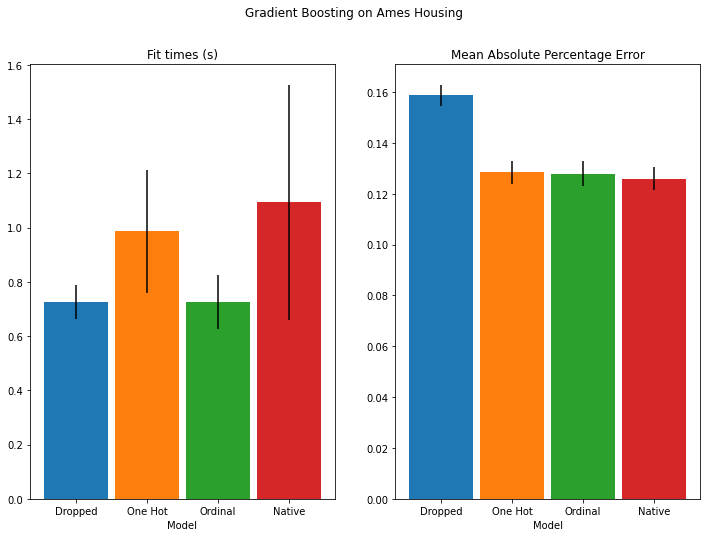

In [46]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

scoring = 'neg_mean_absolute_percentage_error'
n_cv_folds = 3

dropped_result = cross_validate(hist_dropped, X, y, cv=n_cv_folds, scoring=scoring)
one_hot_result = cross_validate(hist_one_hot, X, y, cv=n_cv_folds, scoring=scoring)
ordinal_result = cross_validate(hist_ordinal, X, y, cv=n_cv_folds, scoring=scoring)
native_result = cross_validate(hist_native, X, y, cv=n_cv_folds, scoring=scoring)

def plot_results(figure_title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

    plot_info = [
        ("fit_time", "Fit times (s)", ax1, None),
        ("test_score", "Mean Absolute Percentage Error", ax2, None),
    ]

    x, width = np.arange(4), 0.9
    for key, title, ax, y_limit in plot_info:
        items = [
            dropped_result[key],
            one_hot_result[key],
            ordinal_result[key],
            native_result[key],
        ]

        mape_cv_mean = [np.mean(np.abs(item)) for item in items]
        mape_cv_std = [np.std(item) for item in items]

        ax.bar(
            x=x,
            height=mape_cv_mean,
            width=width,
            yerr=mape_cv_std,
            color=["C0", "C1", "C2", "C3"],
        )
        ax.set(
            xlabel="Model",
            title=title,
            xticks=x,
            xticklabels=["Dropped", "One Hot", "Ordinal", "Native"],
            ylim=y_limit,
        )
    fig.suptitle(figure_title)


plot_results("Gradient Boosting on Ames Housing")

We see that the model with one-hot-encoded data is by far the slowest. This is to be expected, since one-hot-encoding creates one additional feature per category value (for each categorical feature), and thus more split points need to be considered during fitting. In theory, we expect the native handling of categorical features to be slightly slower than treating categories as ordered quantities (‘Ordinal’), since native handling requires sorting categories. Fitting times should however be close when the number of categories is small, and this may not always be reflected in practice.

In terms of prediction performance, dropping the categorical features leads to poorer performance. The three models that use categorical features have comparable error rates, with a slight edge for the native handling.

# One-hot with Pytorch #